In [1]:
import scipy.io
import numpy as np
import sys
sys.path.insert(0, '..')
from utils import get_rdms, get_rdm
import matplotlib.pyplot as plt
import seaborn as sns
import os
%load_ext autoreload
%autoreload 2

In [2]:
file_paths = ['subj001_roistack.mat',
    'subj002_roistack.mat',
    'subj003_roistack.mat',
    'subj004_roistack.mat'
]

sub1 = scipy.io.loadmat(file_paths[0])
sub2 = scipy.io.loadmat(file_paths[1])
sub3 = scipy.io.loadmat(file_paths[2])
sub4 = scipy.io.loadmat(file_paths[3])

In [3]:
def split_into_brain_regions(data):
    # Splits the brain data of each subject into the seperate brain regions.
    d = {}
    rois = data['roistack'][0][0][5]
    betas = data['roistack'][0][0][0]
    indeces = data['roistack'][0][0][4]
    for i in range(1, 7):
        roi = rois[i-1][0][0]
        mask = indeces == i
        beta_roi = betas[:, mask[0]]
        d[roi] = beta_roi
    return d

In [4]:
def get_rdm_for_each_brain_region(data):
    d = {}
    for k, v in data.items():
        rdm = get_rdm(v)
        d[k] = rdm
    return d

In [5]:
sub1 = split_into_brain_regions(sub1)
sub2 = split_into_brain_regions(sub2)
sub3 = split_into_brain_regions(sub3)
sub4 = split_into_brain_regions(sub4)

sub1 = get_rdm_for_each_brain_region(sub1)
sub2 = get_rdm_for_each_brain_region(sub2)
sub3 = get_rdm_for_each_brain_region(sub3)
sub4 = get_rdm_for_each_brain_region(sub4)

In [6]:
# Averaging the RDMS of the four subjects into one representation (for the corresponding brain region)
avg = {}
for k in sub1.keys():
    sub1_v = sub1[k]
    sub2_v = sub2[k]
    sub3_v = sub3[k]
    sub4_v = sub4[k]
    avg[k] = np.mean([sub1_v, sub2_v, sub3_v, sub4_v], axis=0)

In [7]:
def plot_rdms(axs, data):
    for i, x in enumerate(zip(data.keys(), data.values(), axs.flat)):
        k = x[0]
        v = x[1]
        ax = x[2]
        sns.heatmap(v, ax=ax, cmap='plasma')
        ax.set_title(k, fontsize=30, fontweight='bold')

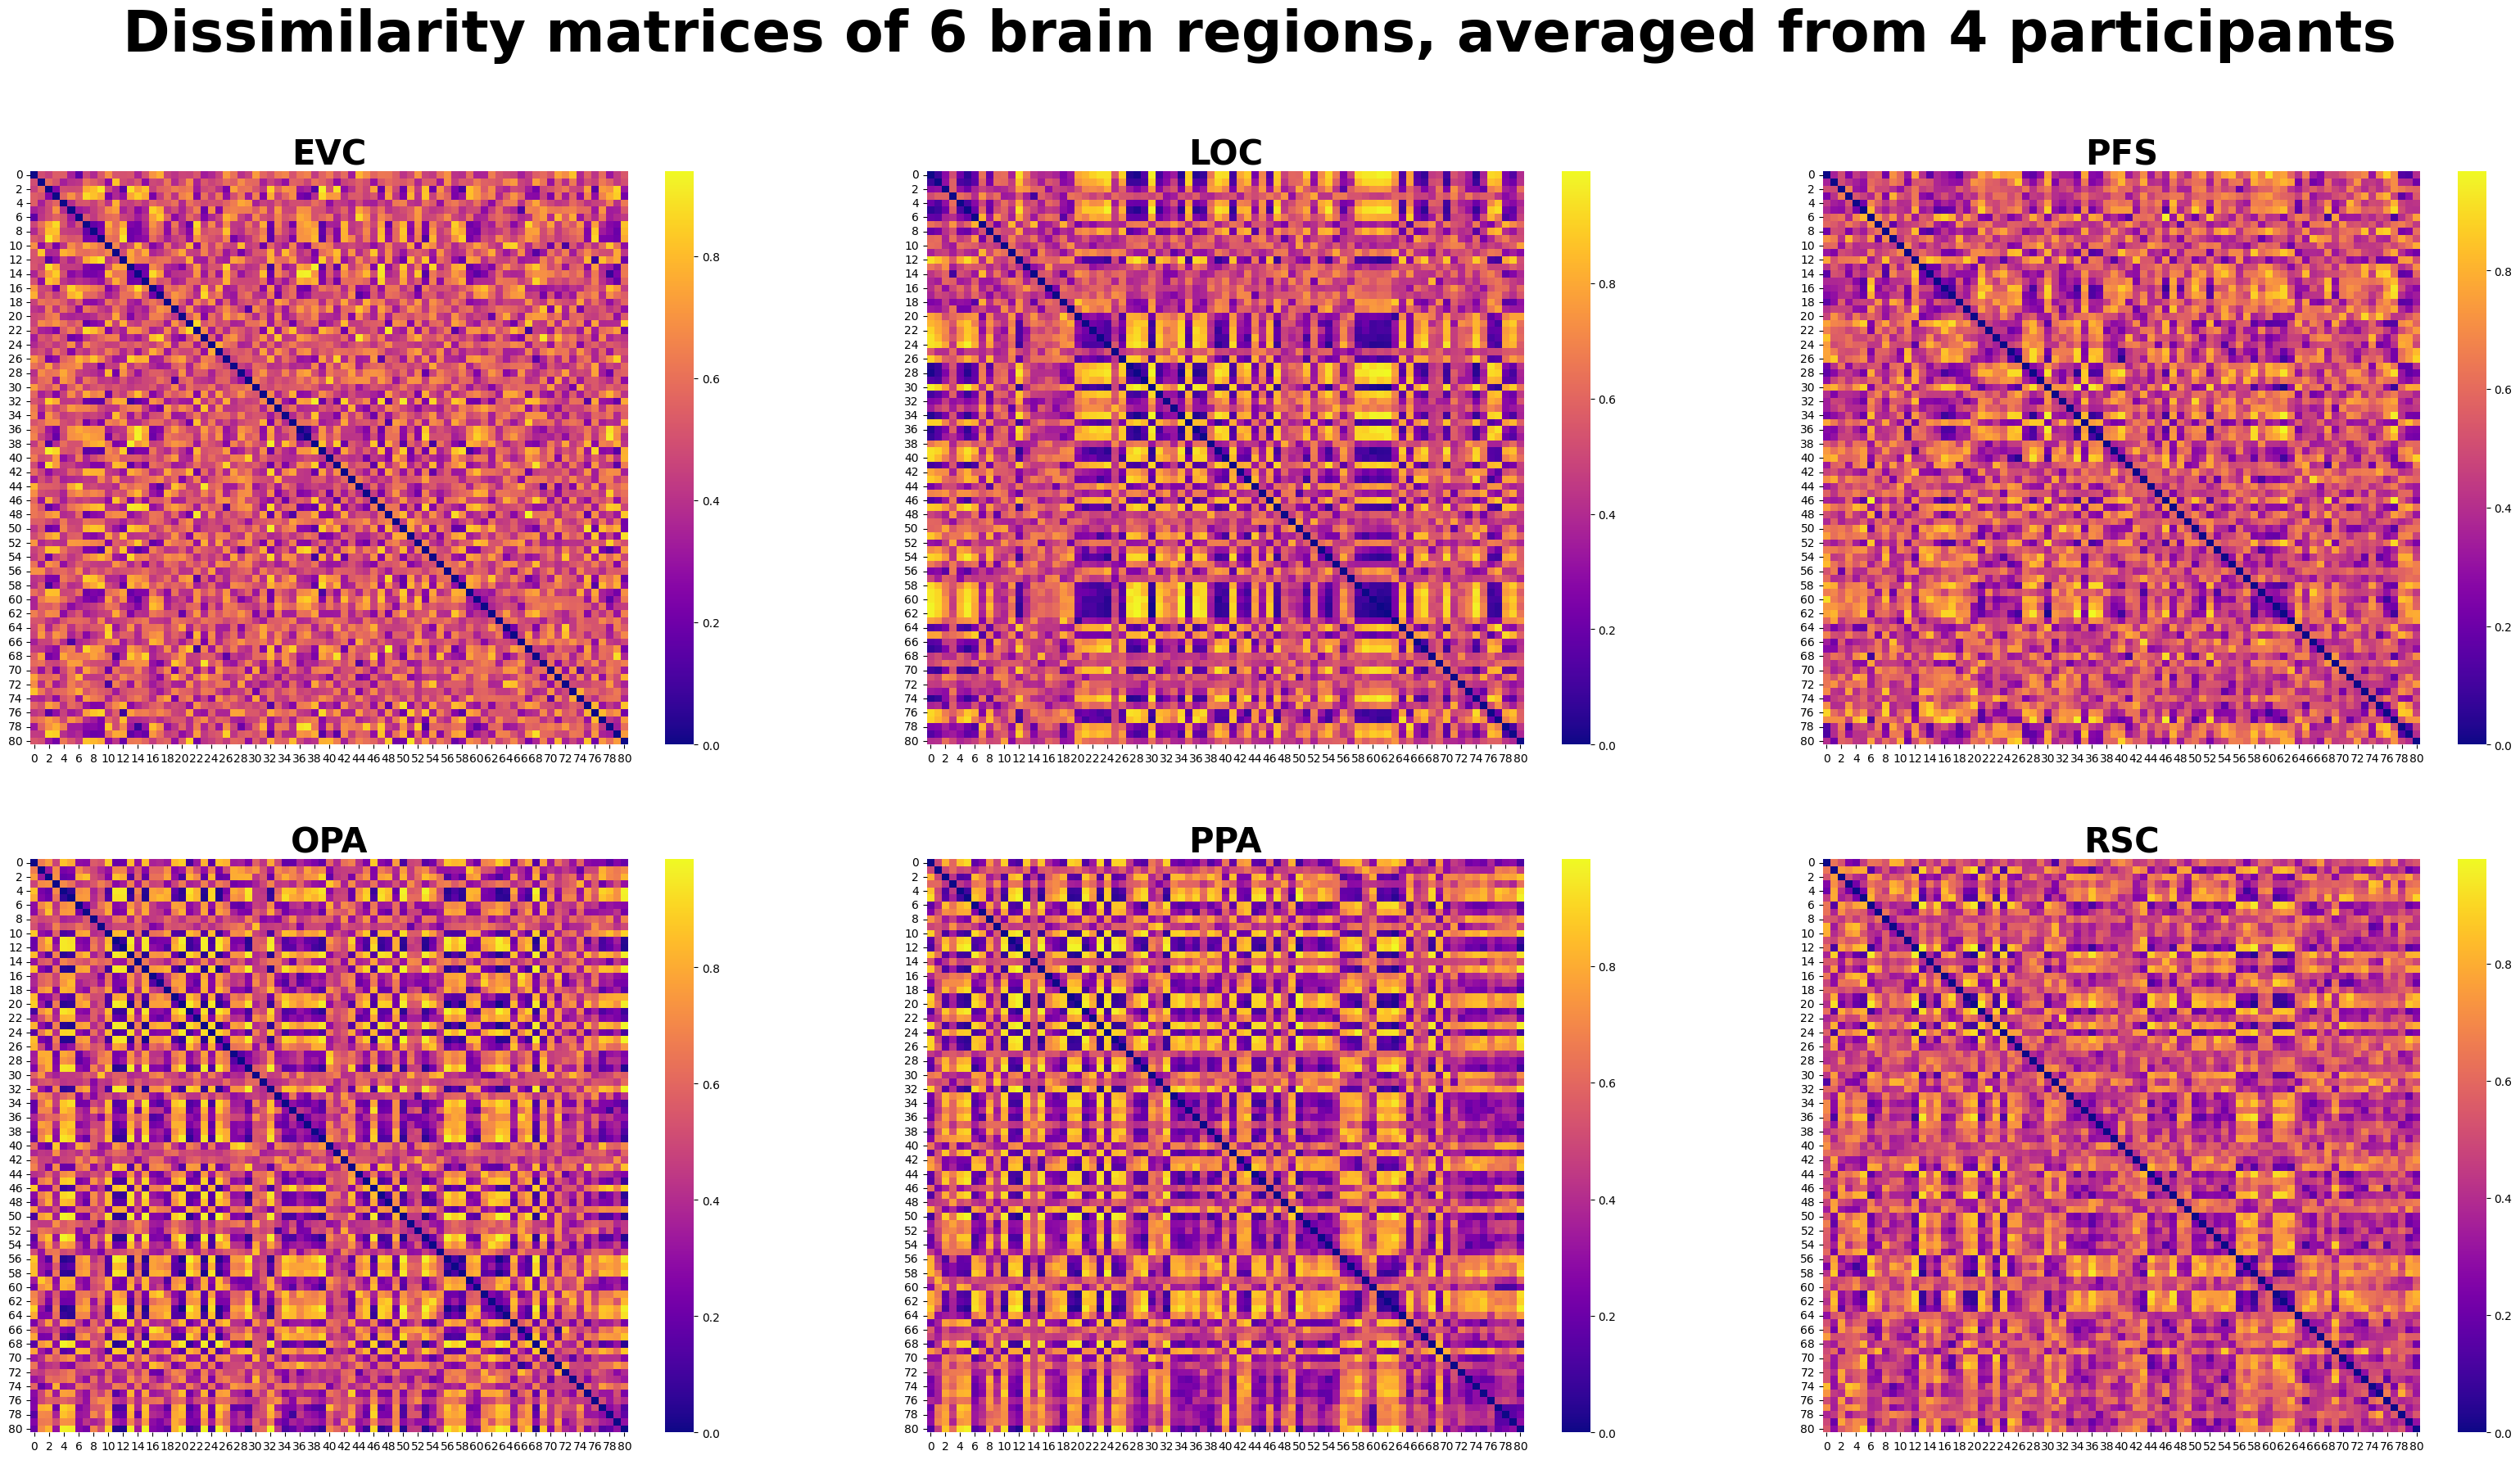

In [8]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(40,20))
fig.suptitle('Dissimilarity matrices of 6 brain regions, averaged from 4 participants', fontsize=50, fontweight='bold')

plot_rdms(axs, avg)

In [9]:
%store avg

Stored 'avg' (dict)
